## Topics

## 0. pyplot.imshow(): aspect ratio and colorbar (from Week 4-2)

## I. Selecting a 2d area of interest

## II.  LIGO Data Release: Two challenges in data analysis
  
       A) If you are told where the signal is, can you see it?
       B) Detection - Frequency-time space
    

## Lab: Starting on HW01



## I. Selecting a 2d area of interest

In [1]:
'''
First of all:
numpy.mgrid vs. numpy.meshgrid
'''
import numpy as np
x = np.linspace(1, 5, 5)
y = np.linspace(11, 15, 5)

xx, yy = np.meshgrid(x, y)
xx2, yy2 = np.mgrid[1.:6.:1, 11.:16.:1]

print('xx type, shape:', type(xx), xx.shape)
print('xx', xx)
print('yy', yy)
print()
print('xx2.T type, shape:', type(xx.T), (xx.T).shape)
print('xx2.T', xx2.T)
print('yy2.T', yy2.T)
print()
print('Comparing xx and xx2:')
print('xx == xx2.T:', xx == xx2.T)

('xx type, shape:', <type 'numpy.ndarray'>, (5, 5))
('xx', array([[ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.]]))
('yy', array([[ 11.,  11.,  11.,  11.,  11.],
       [ 12.,  12.,  12.,  12.,  12.],
       [ 13.,  13.,  13.,  13.,  13.],
       [ 14.,  14.,  14.,  14.,  14.],
       [ 15.,  15.,  15.,  15.,  15.]]))
()
('xx2.T type, shape:', <type 'numpy.ndarray'>, (5, 5))
('xx2.T', array([[ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  5.]]))
('yy2.T', array([[ 11.,  11.,  11.,  11.,  11.],
       [ 12.,  12.,  12.,  12.,  12.],
       [ 13.,  13.,  13.,  13.,  13.],
       [ 14.,  14.,  14.,  14.,  14.],
       [ 15.,  15.,  15.,  15.,  15.]]))
()
Comparing xx and xx2:
('xx == xx2.T:', array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  Tr

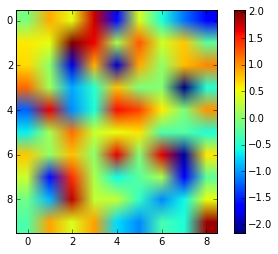

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
# make up a 2d array -- 10 rows and 9 columns
img = np.random.randn(10, 9)
plt.imshow(img)
plt.colorbar()
plt.show()

In [13]:
from __future__  import print_function

'''
Selecting a 2d area of interest

'''
import numpy as np
print('img.shape', img.shape)
np.set_printoptions(formatter={'float': '{:.3f}'.format})

m_rows = img.shape[0]
n_cols = img.shape[1]

rows = np.linspace(0, m_rows-1, m_rows)
cols = np.linspace(0, n_cols-1, n_cols)

print('img:\n', img)

# selecing rows 2, 3
row_idx = np.where( (rows < 4) * (rows > 1))[0]
# selecing columns 6, 7, 8, 9
col_idx = np.where(cols > 5)[0]

print('row_idx:\n', row_idx)
print('col_idx:\n', col_idx)

# note idx2d is a list that consists of two 2d numpy arrays
idx2d = np.meshgrid(row_idx, col_idx)

print('type(idx2d):', type(idx2d))

print('idx2d[0] (row numbers):\n', idx2d[0].T)
print('idx2d[1] (column numbers):\n', idx2d[1].T)


img_cut = img[idx2d[0].T, idx2d[1].T]
print("img_cut.shape:", img_cut.shape)
print("img_cut:\n", img_cut)

img.shape (10, 9)
img:
 [[-0.064 0.902 0.472 1.756 -1.596 0.405 -0.524 -1.157 -1.667]
 [0.615 0.467 2.037 1.627 0.166 1.259 0.369 0.769 -0.210]
 [0.682 0.032 -1.813 0.858 -1.883 0.905 0.053 0.812 1.069]
 [1.198 0.127 -0.936 -0.470 0.800 -0.060 -0.025 -2.158 -0.506]
 [-1.228 1.647 -1.044 -0.530 1.592 1.364 0.600 -0.046 0.989]
 [-0.648 0.152 1.163 0.344 0.507 0.659 -0.297 -0.259 -0.531]
 [0.760 0.043 0.795 0.021 1.651 -0.032 1.672 -2.027 0.626]
 [0.337 -1.584 1.431 0.173 -0.595 -0.238 0.165 -1.654 -0.215]
 [-0.121 -0.875 1.796 0.312 0.285 -0.437 -1.068 -0.607 0.489]
 [-0.302 0.933 0.429 0.951 -0.730 -1.063 -0.327 -0.529 1.927]]
row_idx:
 [2 3]
col_idx:
 [6 7 8]
type(idx2d): <type 'list'>
idx2d[0] (row numbers):
 [[2 2 2]
 [3 3 3]]
idx2d[1] (column numbers):
 [[6 7 8]
 [6 7 8]]
img_cut.shape: (2, 3)
img_cut:
 [[0.053 0.812 1.069]
 [-0.025 -2.158 -0.506]]


## II. LIGO Data Release: Two challenges in data analysis

# SIGNAL PROCESSING WITH GW150914 OPEN DATA 

Welcome! This ipython notebook (or associated python script GW150914_tutorial.py ) will go through some typical signal processing tasks on strain time-series data associated with the LIGO GW150914 data release from the LIGO Open Science Center (LOSC):

* https://losc.ligo.org/events/GW150914/

* View the tutorial as a web page - https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html/
* Download the tutorial as a python script - https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.py/
* Download the tutorial as iPython Notebook - https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.ipynb/

To begin, download the ipython notebook, readligo.py, and the data files listed below, into a directory / folder, then run it. Or you can run the python script GW150914_tutorial.py. You will need the python packages: numpy, scipy, matplotlib, h5py.

On Windows, or if you prefer, you can use a python development environment such as Anaconda (https://www.continuum.io/why-anaconda) or Enthought Canopy (https://www.enthought.com/products/canopy/). 

Questions, comments, suggestions, corrections, etc: email losc@ligo.caltech.edu

v20160208b

## Intro to signal processing

This tutorial assumes that you know python well enough. 

If you know how to use "ipython notebook", use the GW150914_tutorial.ipynb file. Else, you can use the GW150914_tutorial.py script.

This tutorial assumes that you know a bit about signal processing of digital time series data (or want to learn!). This includes power spectral densities, spectrograms, digital filtering, whitening, audio manipulation. This is a vast and complex set of topics, but we will cover many of the basics in this tutorial.

If you are a beginner, here are some resources from the web:
* http://101science.com/dsp.htm
* https://georgemdallas.wordpress.com/2014/05/14/wavelets-4-dummies-signal-processing-fourier-transforms-and-heisenberg/
* https://en.wikipedia.org/wiki/Signal_processing
* https://en.wikipedia.org/wiki/Spectral_density
* https://en.wikipedia.org/wiki/Spectrogram
* http://greenteapress.com/thinkdsp/
* https://en.wikipedia.org/wiki/Digital_filter

And, well, lots more - google it!

## Download the data

* Download the data files from LOSC:
* We will use the hdf5 files, both H1 and L1, with durations of 32 and 4096 seconds around GW150914, sampled at 16384 and 4096 Hz :
  * https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.hdf5
  * https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_4_V1-1126259446-32.hdf5
  * https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_16_V1-1126259446-32.hdf5
  * https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_16_V1-1126259446-32.hdf5
  * https://losc.ligo.org/s/events/GW150914/GW150914_4_NR_waveform.txt
* Download the python functions to read the data: https://losc.ligo.org/s/sample_code/readligo.py
* From a unix/mac-osx command line, you can use wget; for example, 
  * wget https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V1-1126257414-4096.hdf5
* Put these files in your current directory / folder. Don't mix any other LOSC data files in this directory, or readligo.py may get confused.

Here, 
* "H-H1" means that the data come from the LIGO Hanford Observatory site and the LIGO "H1" datector; 
* the "_4_" means the strain time-series data are (down-)sampled from 16384 Hz to 4096 Hz;
* the "V1" means version 1 of this data release;
* "1126257414-4096" means the data starts at GPS time 1126257414 (Mon Sep 14 09:16:37 GMT 2015), duration 4096 seconds;
  * NOTE: GPS time is number of seconds since Jan 6, 1980 GMT. See http://www.oc.nps.edu/oc2902w/gps/timsys.html or https://losc.ligo.org/gps/ 
* the filetype "hdf5" means the data are in hdf5 format:
https://www.hdfgroup.org/HDF5/

Note that the the 4096 second long files at 16384 Hz sampling rate are fairly big files (125 MB). 
You won't need them for this tutorial:
* https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V1-1126257414-4096.hdf5
* https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_4_V1-1126257414-4096.hdf5
* https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_16_V1-1126257414-4096.hdf5
* https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_16_V1-1126257414-4096.hdf5


## Below my comments come after **  
## -XH

## Before we start...

## Setting Up Your Computational Course Folder, something along the line of 

     ~/COMPPHYS-II/JNGUYEN

## Then create a directory 

     LIGO

## Now from the terminal:

    enpkg matplotlib
    enpkg hdf5
    
    # useful python functions
    wget https://losc.ligo.org/s/sample_code/readligo.py  # if this doesn't work, download using a web brower
    # download data
    wget https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.hdf5
    wget https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_16_V1-1126259446-32.hdf5
    wget https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_16_V1-1126259446-32.hdf5
    wget https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_4_V1-1126259446-32.hdf5
    wget https://losc.ligo.org/s/events/GW150914/GW150914_4_NR_waveform.txt
    
### move (mv) all data files and the .py files to the directory

    LIGO

In [15]:
'''

making sure you have pickle

'''
import pickle

In [16]:
# ** The paper
from IPython.core.display import HTML
HTML('<iframe src=https://dcc.ligo.org/public/0122/P150914/014/LIGO-P150914_Detection_of_GW150914.pdf width=1000 height=700></iframe>')

# Or you can go to Physical Review Letters directly:
# https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.116.061102

Minimum of (m1+m2): 68.929421


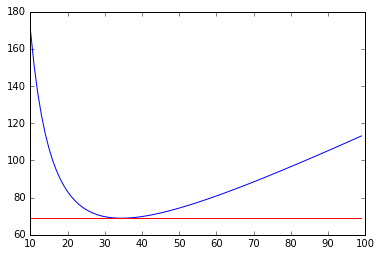

In [8]:
%matplotlib inline

# scipy.optimize.fsolve(func, x0, args=(), fprime=None, \
# full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)

import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

def M(m1, m2):
    return ((m1*m2)**(3./5.))/((m1 + m2)**(1./5.)) - 30.

m2_guess = np.arange(10., 100., 1.)
# x0 = np.arange(0., 30., 1.)
m1m2_sum_lst = []

for guess in m2_guess:
    x = fsolve(M, x0=10., args=(guess))
    m1m2_sum_lst.append(x + guess)
#     print(guess, x, guess + x)

m1m2_sum_lst = np.array(m1m2_sum_lst)
min_m1m2_lst = m1m2_sum_lst.min()

y = np.ones(len(m1m2_sum_lst))
y *= min_m1m2_lst

print('Minimum of (m1+m2): {:f}'.format(min_m1m2_lst))
plt.figure()
plt.plot(m2_guess, m1m2_sum_lst)
plt.plot(m2_guess, y, 'r')

plt.show()
        


## 1. What did GR predict about the effects of a gravitational wave (GW) passing?

## 2. What Did LIGO Try to Measure?

## 3. Kip Thorne's Contribution: Numerical Relativity

- ## Precise, quantitative prediction of the effects of GW for strain measurements.
- ## High computation requirement for NR: Strain signatures for different sources of GW saved for comparison with experimental results. 

## *It's the advancement in 2. and 3. in the last two decades that made possible a detailed comparison between theory and experiement, which led to the discovery.*

In [21]:
# Standard python numerical analysis imports:
from __future__ import print_function
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

%matplotlib inline
# ** This should make figures look sharper
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import h5py

# LIGO-specific readligo.py 
import sys
from os.path import expanduser
# this may work on a PC -- if it doesn't please let me know.
HOME = expanduser("~")
# the following line would be different for everyone.
# e.g. for James it may be '/COMPPHYS-II/JNGUYEN/LIGO'
my_ligo_subdir = '/COMPPHYS-II/JNGUYEN/LIGO/'
ligo_dir = HOME + my_ligo_subdir
sys.path.append(ligo_dir)
import readligo as rl

In [42]:
#----------------------------------------------------------------
# Load LIGO data from a single file
#
# ** For CP-II, I will only load data from H1
#----------------------------------------------------------------
# First from H1
fn_H1 = ligo_dir + 'H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = rl.loaddata(fn_H1, 'H1')

# sampling rate:  (**We've seen something similar in CP-I)
fs = 4096
# both H1 and L1 will have the same time vector, so:
time = time_H1
# the time sample interval (uniformly sampled!)  (**We've seen this this semester!)
dt = time[1] - time[0]

## Adding a numerical relativity template

Now let's also read in a theoretical (numerical relativity) template, 
generated with parameters favored by the output from the GW150914 parameter estimation (see the GW150914 detection paper, https://dcc.ligo.org/P150914/public ).

This NR template corresponds to the signal expected from a pair of black holes with masses of around 36 and 29 solar masses, merging into a single black hole of 62 solar masses, at a distance of around 410 Mpc. 

You can fetch the template time series from the following URL, and put it in your working directory / folder:
* https://losc.ligo.org/s/events/GW150914/GW150914_4_NR_waveform.txt


In [43]:
# read in the NR template
NRtime, NR_H1 = np.genfromtxt(ligo_dir + 'GW150914_4_NR_waveform.txt').transpose()

## We will only look at the data from one of the two detectors, H1 (Hanford) 
## (For the L1 data, you can follow the LIGO ipython notebook yourself.)

In [44]:
# First, let's look at the data and print out some stuff:

print('time_H1: len, min, mean, max = {}, {:.9e}, {:.9e}, {:.9e}'.format( \
   len(time_H1), time_H1.min(), time_H1.mean(), time_H1.max()))
# Pay attention to how small the strain signal is!
print('strain_H1: len, min, mean, max = {}, {:.4e}, {:.4e}, {:.4e}'.format(\
   len(strain_H1), strain_H1.min(),strain_H1.mean(),np.abs(strain_H1.max())))
    

time_H1: len, min, mean, max = 131072, 1.126259446e+09, 1.126259462e+09, 1.126259478e+09
strain_H1: len, min, mean, max = 131072, -7.1200e-19, 8.7328e-23, 7.7148e-19


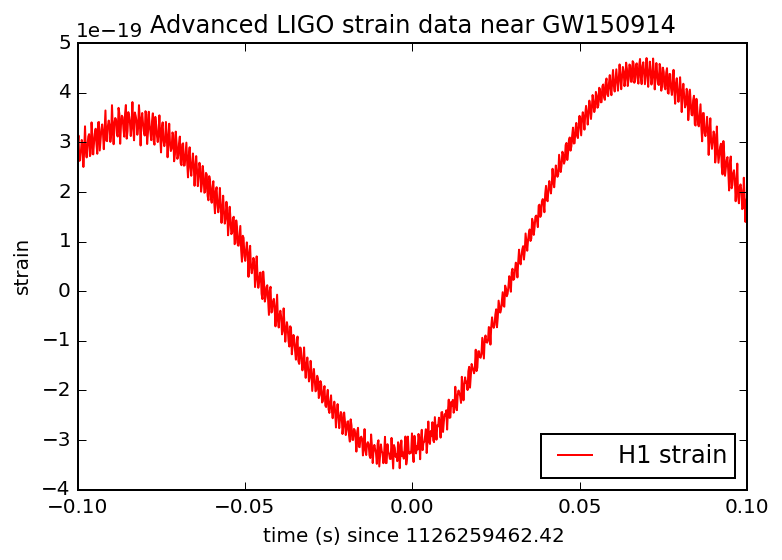

In [45]:
# plot +/- 5 seconds around the event:
tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
deltat = .1                     # seconds around the event

# index into the strain time series for this time interval:
# indxt = np.where((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

# ** Note they used np.where -- but you know that you don't have to!
# ** Try the following!
indxt = (time_H1 >= tevent-deltat) * (time_H1 < tevent+deltat)

plt.figure()
plt.plot(time_H1[indxt]-tevent,strain_H1[indxt],'r',label='H1 strain')
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('strain')
plt.legend(loc='lower right')

# If I narrow it down to -0.1 to 0.1 sec you still can't see the signal!
# (Yes, it's in that narrow time window!)
# Though in this smaller [-0.1, 0.1] window, you can see there is clearly 
# low frequency noise.
#plt.xlim(-0.1, 0.1)
plt.title('Advanced LIGO strain data near GW150914')
plt.savefig('GW150914_strain.png')

## **

## So even if someone tells you the data is within these 10 seconds (or 0.2 sec!), you still can't see it!

##...Not without with some sophisticated signal processing.

## First Step: "Whitening" 
### (CP-I students encountered this notion in face recognition)

## Data in the Fourier domain - ASDs

## ** Think: for light in the optical wavelength range, frequency is associated with what kind of sensory information?  (Color)

## ** The strain intensity also depends on frequency (or "color").

## ** You should think of noises this way: they are signals that come from a source other than the one you are interested in.

## ** (Imagine you are trying to listen to your friend in a crowded room with many people talking at the same time -- everybody else's voice is a noise.  But of course each of the other voices is really a signal, just not to you!)

## ** They are noises because they interfere with the measurement of the signal you are interested in.  


## ** The degree to which they can interfere with your signal is given as the uncertainty.  A signal from another source that can seriously interfere with your signal will represent a significant uncertainty (because there is a high level of uncertainty whether it's the actual signal you're looking for or something else).  

## ** What you will see below:

Strain intensity is represented in the plot below as amplitude spectral density, ASD.

The ASDs are the square root of the power spectral densities (PSDs -- CP-I students: PSD is the same as the power spectrum, or the modulus of the fourier components squared).

They are an estimate of the "strain-equivalent noise" (that is, strain caused by sources other than GW) of the detectors versus frequency, which limits the ability of the detectors to identify GW signals.

You will also see spikes: They simply represent an extreme form of the frequency dependence of noises -- no different from the gentler trends.

Dividing the total strain signal in frequency space (or "the Fourier Transform of the strain time series") by ASD amounts to removing the gentle frequency (or color) dependence as well the spikes.  This is why this process is called 
"whitening".


## ** Bottom line: Given a strain time series, you may think you want to deal with the noise at each time when the measurement is made.  That's one way to do it -- but in this case, the best thing to do is to understand how the noise depends on frequency.  

## ** The advantage of dealing with the signal in the "frequency domain" is easy to see.  For example: In this domain, you would expect a strong signal at 60 Hz from the AC power supply (and as you will see, it is indeed there!) --  since this is not the signal you're interested in, it represents a potential (strong) source of noise!!  

## ** The way to turn a signal as a function of time to the same signal as a function of frequency is by performing the Fourier Tranform -- which some of you are learning in Math Methods, and which we will talk about how to do numerically in CP-I.

fs 4096
freq: len, min, max 2049 0.0 2048.0


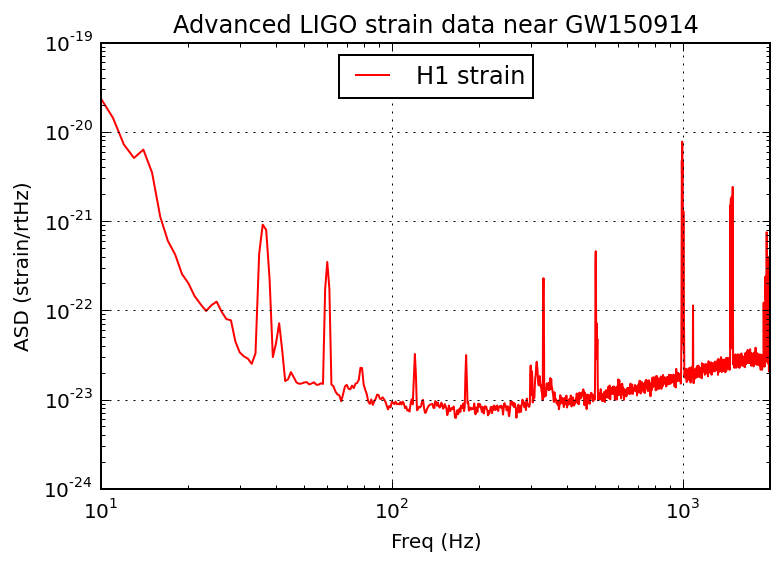

In [46]:
'''

Here they show what the noise looks like in "frequency" space.

Point out the spikes at 60 Hz, 120 Hz, 180 Hz, 240 Hz, etc.


'''

# number of sample for the fast fourier transform:
# ** We worked extensively with FFT in CP-I.
NFFT = 1*fs
print('fs', fs)
fmin = 10
# ** Given that the samplin rate is 4096, the maximum detectable frequency 
# (Nyuqist frequency) is 2048.  Thus fmax = 2000.
fmax = 2000
# ** We have calculated FFT and then the power spectrum in CP-I
# ** another way of saying power spectrum is PSD (power spectral density).
# ** And this is what Pxx_H1 is -- it's simply the power spectrum.
Pxx_H1, freqs = mlab.psd(strain_H1, Fs = fs, NFFT = NFFT)

print('freq: len, min, max', len(freqs), freqs.min(), freqs.max())

# We will use interpolations of the ASDs computed above for whitening:
# ** I mentioned whitening in an email related to facial recognition
psd_H1 = interp1d(freqs, Pxx_H1)

# plot the ASDs:
plt.figure()
# ** Note: it's a log-log plot
plt.loglog(freqs, np.sqrt(Pxx_H1),'r',label='H1 strain')
plt.axis([fmin, fmax, 1e-24, 1e-19])
plt.grid('on')
plt.ylabel('ASD (strain/rtHz)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('Advanced LIGO strain data near GW150914')
plt.savefig('GW150914_ASDs.png')
plt.show()
# Thus this thing squared is the variance/Hz.

## ** The highest frequency detectable:

## ** we spent quite a bit of time on Nyquist frequency = fs/2 in CP-II!
The sample rate is fs = 4096 Hz (2^12 Hz), so the data cannot capture frequency content above the Nyquist frequency = fs/2 = 2048 Hz. That's OK, because GW150914 only has detectable frequency content in the range 20 Hz - 300 Hz.

You can see strong spectral lines in the data; they are all of instrumental origin. Some are engineered into the detectors (mirror suspension resonances at ~500 Hz and harmonics, calibration lines, control dither lines, etc) and some (60 Hz and harmonics) are unwanted. We'll return to these, later.

You can't see the signal in this plot, since it is relatively weak and less than a second long, while this plot averages over 32 seconds of data. So this plot is entirely dominated by instrumental noise (i.e., signals we don't care about).

In [47]:
'''
Whitening gets rid of low frequency noise

Why is it that dividing the FT of the time series by ASD does NOT get rid of the signal?  

Because ASD = |FT|.  The division preserves the phase information,
but gets rid of wavelength undulations in the amplitude.  This is what we want: 
"whitening" the time series

[For interested students (esp. those who took Methods with me): 

a) We know that the value of signal at any time is the sum of all the Fourier (freq) 
components, each with its coefficient (the absolute value of which we call amplitude).

b) Conversely, the value of the Fourier spectrum of a signal (in freq space) 
at any frequency is proportional to the sum the Fourier coeff corresponding 
to this frequency for the length of time during which this signal has been 
sampled).    

So really the absolutely value of that, which is ASD, tells you 
the standard deviation of fluctuations at this frequency.  Because if you square 
ASD, it's equal to all the Fourier coeff's squared and added up and divided by N.  
(You can visualize this by using the convention that there is a 1/sqrt(N) factor 
in front of the sum that is DFT -- and of course another factor of 1/sqrt(N) in front 
of the inverse FT.  Remember in Methods, my convention for FT and inverse FT was that 
each had a factor of 1/sqrt(L) in front of it.)

Consider the following two signals, (i) and (ii): 

(i) y1(t) = 4*sin(f*t)
(ii) y2(t) = (4*t)*sin(f*t)

If both have been measured for a reasonably long period of time, the ASD of (i) will
twice as large as (ii)

]

'''

# function to whiten data
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    # ** remember: we used np.fft in CP-I.
    freqs = np.fft.rfftfreq(Nt, dt)
    print('freqs len, max, min, mean:', len(freqs), freqs.max(), freqs.min(), freqs.mean())
    print('dt, 1/dt', dt, 1/dt)
    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(strain)
    white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
    
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

# now whiten the data from H1, and also the NR template:
strain_H1_whiten = whiten(strain_H1,psd_H1,dt)
NR_H1_whiten = whiten(NR_H1,psd_H1,dt)

freqs len, max, min, mean: 65537 2048.0 0.0 1024.0
dt, 1/dt 0.000244140625 4096.0
freqs len, max, min, mean: 1385 2047.26038281 0.0 1023.6301914
dt, 1/dt 0.000244140625 4096.0


## ** Now to get rid of high frequency noise

Now plot the whitened strain data, along with the best-fit numerical relativity (NR) template.

To get rid of remaining high frequency noise, we will also bandpass the data (see bandpassing, below).

** For CP-I students, again this is done by Fourier Transform.

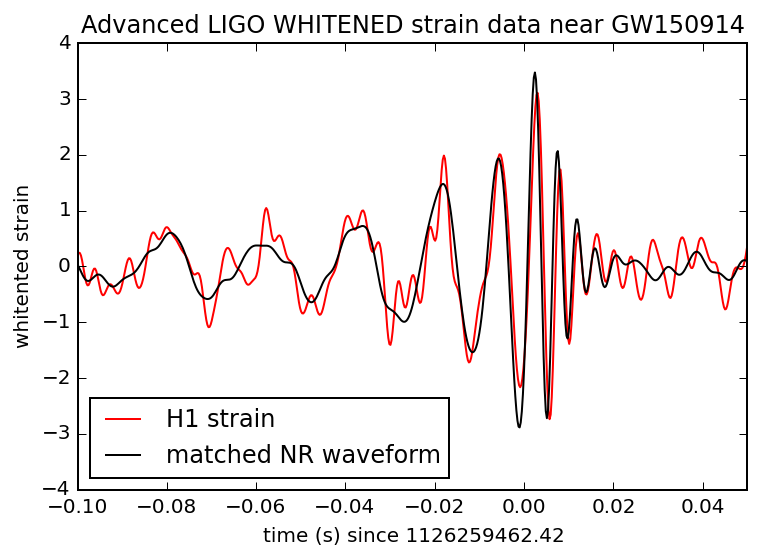

In [48]:
# We need to suppress the high frequencies with some bandpassing:
# ** We have done filtering (cutting out certain frequencies) in CP-I.
bb, ab = butter(4, [20.*2./fs, 300.*2./fs], btype='band')
strain_H1_whitenbp = filtfilt(bb, ab, strain_H1_whiten)
NR_H1_whitenbp = filtfilt(bb, ab, NR_H1_whiten)

# plot the data after whitening:

# ** even in the time domain you can see the frequency and amplitude increase
# ** near t = 0.0.
plt.figure()
plt.plot(time-tevent,strain_H1_whitenbp,'r',label='H1 strain')
plt.plot(NRtime+0.002,NR_H1_whitenbp,'k',label='matched NR waveform')
plt.xlim([-0.1,0.05])
plt.ylim([-4,4])
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('whitented strain')
plt.legend(loc='lower left')
plt.title('Advanced LIGO WHITENED strain data near GW150914')
# ** we have used plt.savefig in CP-I 
plt.savefig('GW150914_strain_whitened.png')

## ** Isn't this amazing!!
## ** But how did they know where to look first??

## Spectrograms

Now let's plot a short time-frequency spectrogram around GW150914:

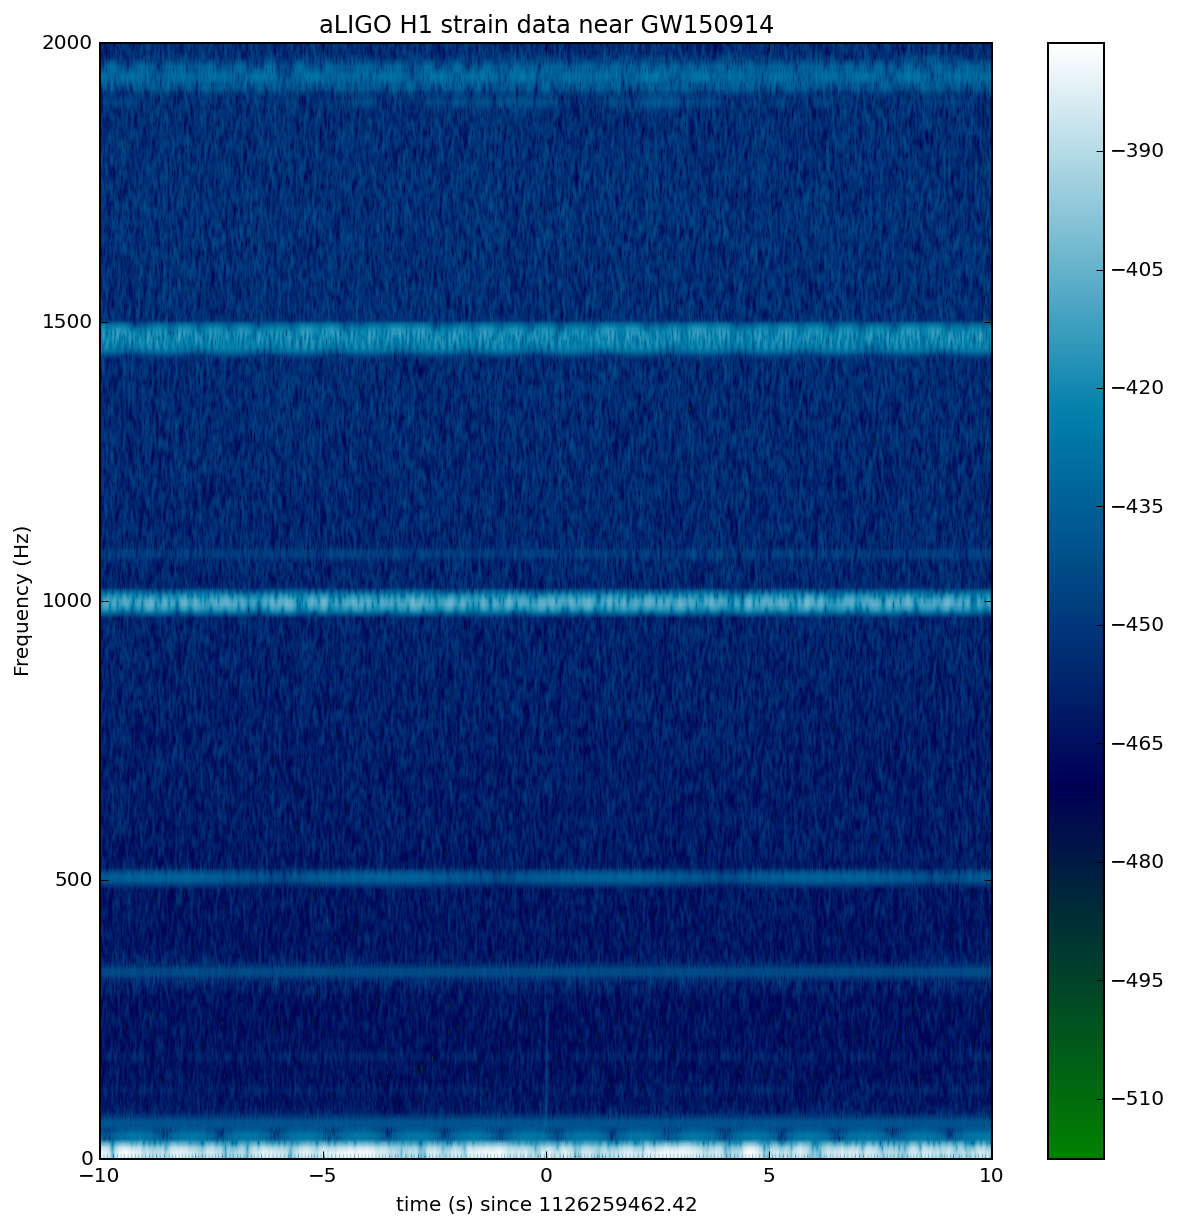

In [50]:
tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 10.                    # seconds around the event
# index into the strain time series for this time interval:
indxt = np.where((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

# pick a shorter FTT time interval, like 1/8 of a second:
NFFT = fs/8
# and with a lot of overlap, to resolve short-time features:
NOVL = NFFT*15/16
# and choose a window that minimizes "spectral leakage" 
# (https://en.wikipedia.org/wiki/Spectral_leakage)
window = np.blackman(NFFT)

# ** We have also played a little bit with different colormaps in CP-I
# the right colormap is can be quite important! See:
# http://matplotlib.org/examples/color/colormaps_reference.html
# viridis seems to be the best for our purposes, but it's new; if you don't have it, 
# you can settle for ocean.
# spec_cmap='viridis'
spec_cmap='ocean'

# Plot the H1 spectrogram:
plt.figure(figsize = (10, 10))
spec_H1, freqs, bins, im = plt.specgram(strain_H1[indxt], NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat,deltat])
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO H1 strain data near GW150914')
plt.savefig('GW150914_H1_spectrogram.png')



In the above spectrograms, you can see lots of excess power below ~20 Hz, as well as strong spectral lines at 500, 1000, 1500 Hz (also evident in the ASDs above). The lines at multiples of 500 Hz are the harmonics of the "violin modes" of the fibers holding up the mirrors of the LIGO interferometers.

The signal is just barely visible here, at time=0 and below 500 Hz. We need to zoom in around the event time, and to the frequency range from [20, 400] Hz, and use the whitened data generated above.

See the smudge between -0.2 and 0 seconds? That's our signal!
You can see it 'chirping' from lower to higher frequency over a small fraction of a second.

t: max, min, len 9.99987506866 -9.99988079071 81920
spect_H1.shape (129, 5105)
freq: 2048.0 0.0 16.0
bins: 19.96875 10.0 0.03125 0.00390625 5105 0.00390625


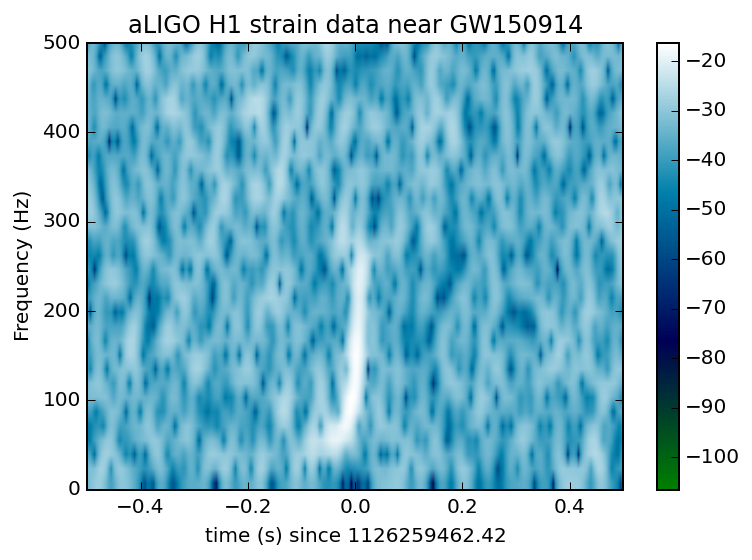

In [51]:
#  plot the whitened data, zooming in on the signal region:
tevent = 1126259462.422          # Mon Sep 14 09:50:45 GMT 2015 
deltat = 10.                      # seconds around the event
# index into the strain time series for this time interval:
indxt = np.where((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

# ** I added the following line
t = time_H1[indxt]
print('t: max, min, len', t.max() - tevent, t.min() - tevent, len(t))

# pick a shorter FTT time interval, like 1/16 of a second:
# ** I changed 1/16 to 1/n.
# ** now the frequency is sampled at 16 Hz intervals instead of 1 Hz
# ** this is why we will end up with 129 frequency values, 4096/16,
# ** plus 0 Hz. 
# ** previous cell: n = 8; here n = 16: on small time scales, this is better.
n = 16
NFFT = fs/n

# with a lot of overlap, to resolve short-time features:
NOVL = NFFT*15/16
# NOVL = NFFT*7/8

# and choose a window that minimizes "spectral leakage" 
# (https://en.wikipedia.org/wiki/Spectral_leakage)
window = np.blackman(NFFT)

# Plot the H1 whitened spectrogram around the signal
plt.figure()
spec_H1, freqs, bins, im = plt.specgram(strain_H1_whiten[indxt], NFFT=NFFT, Fs=fs, window=window, 
                                        noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat,deltat])
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-0.5, 0.5, 0, 500])
plt.title('aLIGO H1 strain data near GW150914')
plt.savefig('GW150914_H1_spectrogram_whitened.png')

print('spect_H1.shape', spec_H1.shape)
print('freq:', freqs.max(), freqs.min(), np.gradient(freqs)[0])
# ** bins max and min are set by 20*(1-/2n) and 1/2n.
# ** whereas del_bins = bins[1] - bins[0] is set by bins.max() - bins.min())/(len(bins)-1)
# ** The reason len(bins) is high because the original sampling rate is very high: 16384 Hz.
# ** del_bins = 0.00390625 = 1/256, why??
print('bins:', bins.max(), bins.mean(), bins.min(), bins[1] - bins[0], len(bins), (bins.max() - bins.min())/(len(bins)-1))


with open('ligo_freq_t.p', 'w') as f:
    pickle.dump({'spec_H1': spec_H1, 'freqs': freqs, 't': bins}, f )


In [52]:
'''For HW01, all you have to do is the following'''


with open('ligo_freq_t.p', 'r') as f:
    spec_data = pickle.load(f)

bins = spec_data['t']
freqs = spec_data['freqs']
spec_H1 = spec_data['spec_H1']

## Make sound files

Make wav (sound) files from the filtered, downsampled data, +-2s around the event.

In [54]:
# make wav (sound) files from the whitened data, +-2s around the event.

from scipy.io import wavfile

# function to keep the data within integer limits, and write to wavfile:
# ** we have dealt with sound files in CP-I (did we make wav files?)
def write_wavfile(filename,fs,data):
    d = np.int16(data/np.max(np.abs(data)) * 32767 * 0.9)
    wavfile.write(filename,int(fs), d)

tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 2.                     # seconds around the event

# index into the strain time series for this time interval:
indxt = np.where((time >= tevent-deltat) & (time < tevent+deltat))

# write the files:
write_wavfile("GW150914_H1_whitenbp.wav",int(fs), strain_H1_whitenbp[indxt])
write_wavfile("GW150914_NR_whitenbp.wav",int(fs), NR_H1_whitenbp)


In [55]:
#To play the sound, with what we learned in CP-I, we do

import os
os.system("afplay GW150914_H1_whitenbp.wav")
# It's easier to hear it in the theoretic prediction -- less noisy
# os.system("afplay GW150914_NR_whitenbp.wav")


0

With good headphones, you'll hear a faint thump in the middle.

We can enhance this by increasing the frequency; 
this is the "audio" equivalent of the enhanced visuals that NASA employs on telescope images with "false color".

## ** Note how they shifted the data to a different frequency by using fft!
The code below will shift the data up by 400 Hz (by taking an FFT, shifting/rolling the frequency series, then inverse fft-ing). The resulting sound file will be noticibly more high-pitched, and the signal will be easier to hear.

## Shifting the data to a different frequency range

In [56]:
from IPython.display import HTML
HTML('<iframe src = http://www.wired.com/wp-content/uploads/2014/08/i_photo6.jpg width=670 height=410 iframe>')

## Can we see infrared light?

Of course not.  The signal of the thermal image is translated from the infrared range into visible light range.

You can do this by Fourier Transform:

 *   First perform FT on the IR image
 *   Shift the FT from the IR range to the visible range
 *   Inverse FT the shifted FR, you get the above image

## We can do the same for sound:

## Our ears are a little more sensitive to vibrations at a higher frequency so 

## we shift the signal, which is in a low frequence range, to a higher frequency range

In [57]:
# function that shifts frequency of a band-passed signal
def reqshift(data,fshift=100,sample_rate=4096):
    """Frequency shift the signal by constant
    """
    # ** FT the signal
    x = np.fft.rfft(data)
    
    T = len(data)/float(sample_rate)
    df = 1.0/T
    nbins = int(fshift/df)
    
    # ** shift the result of the FT in freq space by nbins, 
    # ** which shifts everything by fshift (see line above)  
    y = np.roll(x.real,nbins) + 1j*np.roll(x.imag,nbins)
    
    # ** inverse FT
    z = np.fft.irfft(y)
    
    return z

# parameters for frequency shift
fs = 4096
fshift = 400.
speedup = 1.
fss = int(float(fs)*float(speedup))

# shift frequency of the data
strain_H1_shifted = reqshift(strain_H1_whitenbp,fshift=fshift,sample_rate=fs)
NR_H1_shifted = reqshift(NR_H1_whitenbp,fshift=fshift,sample_rate=fs)

# write the files:
write_wavfile("GW150914_H1_shifted.wav",int(fs), strain_H1_shifted[indxt])
write_wavfile("GW150914_NR_shifted.wav",int(fs), NR_H1_shifted)

In [58]:
'''
Let's try something else here to play the sound.

This way of playing sound is platform-independent,
though restricted to the notebook for now).

'''
import IPython
IPython.display.Audio("GW150914_H1_shifted.wav")
# This is the theoretical prediction -- it should be a little cleaner:
# IPython.display.Audio("GW150914_NR_shifted.wav")

# End of Week 5-1